1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [3]:
import pandas as pd
openrank = pd.read_csv('open_rank_20236.csv')
openrank.head()
print("最大值", openrank['value'].max())
print("最小值", openrank['value'].min())
print("均值", openrank['value'].mean())
print("中位数",openrank['value'].median())

最大值 1394.45
最小值 200.68
均值 346.9679
中位数 273.66999999999996


2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [33]:
activity = pd.read_csv('activity_2022.csv')
df = activity.iloc[:, 1:]
pct_change_columns = df.pct_change(axis='columns')
print(pct_change_columns.mean(axis=1))

0   -0.017928
1    0.000295
2   -0.022848
3   -0.003651
4    0.140824
5   -0.012404
6    0.008453
7    0.022905
8    0.013160
9   -0.003778
dtype: float64


3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [19]:
china = pd.read_csv('china_2022.csv')
global_ = pd.read_csv('global_2022.csv')
print("value min: china", china['value'].min(), "global", global_['value'].min())
print("value max: china", china['value'].max(), "global", global_['value'].max())
print("value mean: china", china['value'].mean(), "global", global_['value'].mean())
print("value median: china", china['value'].median(), "global", global_['value'].median())
print("issue_comment min: china", china['issue_comment'].min(), "global", global_['issue_comment'].min())
print("issue_comment max: china", china['issue_comment'].max(), "global", global_['issue_comment'].max())
print("review_comment min: china", china['review_comment'].min(), "global", global_['review_comment'].min())
print("review_comment max: china", china['review_comment'].max(), "global", global_['review_comment'].max())

value min: china 12033.71 global 71636.82
value max: china 103368.49 global 824848.67
value mean: china 40269.534 global 215855.491
value median: china 29789.235 global 102790.85
issue_comment min: china 11741 global 78530
issue_comment max: china 167814 global 1437317
review_comment min: china 2113 global 35072
review_comment max: china 60402 global 456166


4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

答：概率为17/23

5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

答：概率为7/9

6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

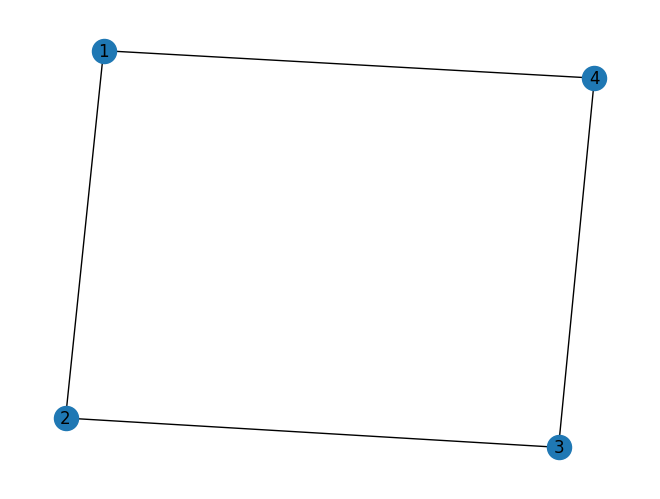

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
user = [1, 2, 3, 4] 
edge = [(1, 2), (2, 3), (3, 4), (4, 1)]
G = nx.Graph()
G.add_edges_from(edge)
nx.draw(G, with_labels=True)
plt.show()

7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

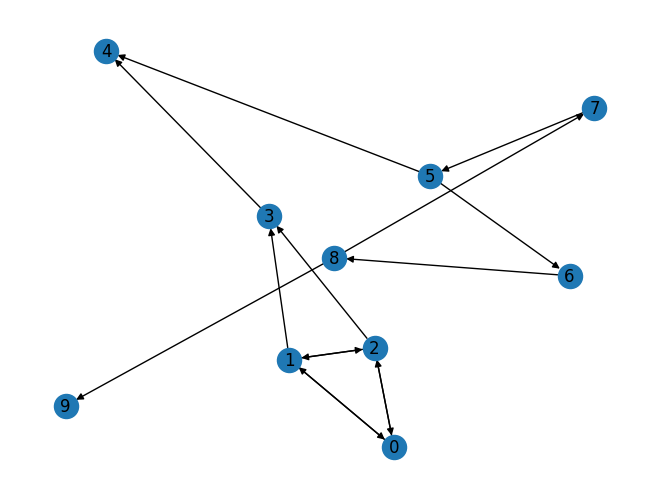

In [ ]:
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),(2, 1), (1, 3), (2, 3), (3, 4), (5, 4),(5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G = nx.DiGraph()
G.add_edges_from(edges)
nx.draw(G, with_labels=True)
plt.show()

8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

{0: 0.09499069584253748, 1: 0.10547659652084884, 2: 0.10547659652084884, 3: 0.09499069584253748, 4: 0.15931683334639937, 5: 0.1020112395832942, 6: 0.0785753675867465, 7: 0.0785753675867465, 8: 0.1020112395832942, 9: 0.0785753675867465}


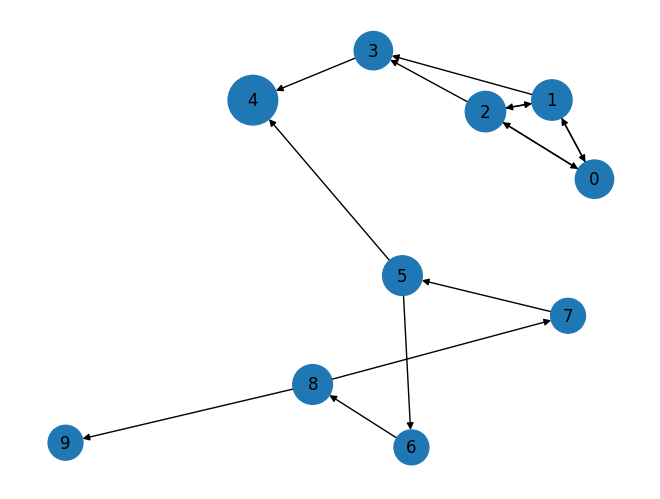

In [45]:
pagerank = nx.pagerank(G)
print(pagerank)
nx.draw(G, with_labels=True, node_size=[v * 8000 for v in pagerank.values()])
plt.show()